# TWO SIGMA

In [60]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', 1000)

In [61]:
# Reading files 
train=pd.read_json('E:\\Kaggle\\Two Sigma Rental Listings\\train.json')
test=pd.read_json('E:\\Kaggle\\Two Sigma Rental Listings\\test.json')

In [62]:
train.head(2) # Looking at the head of the train data

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,"BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind yourself and your home in the center of it all. Steps from Grand Central Station, at the epicenter of Manhattan, The Centra combines convenience and luxury to create a perfectly balanced living experience. Offering newly renovated over sized apartment layouts.<br /><br />Full Time DoormanElevatorNewly Renovated HallwaysLaundry in BuildingOn-Site Parking Garage<br /><br />I operate with the utmost care and integrity. The client is my #1 priority. Contact me for a viewing of the great apartment, I'm more than confident we'll find a place for you to call home.Call/Text Keon: Email: If you require a move within 30 days write ""URGENT"" in the subject email or text message to be taken with high priority.<br /><br />One Month Free - net effective rent listed<p><a website_redacted",East 44th,"[Doorman, Elevator, Laundry in Building, Dishwasher, Hardwood Floors, No Fee]",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,"[https://photos.renthop.com/2/7092344_7663c19af02c46104bc4c569f7162ae0.jpg, https://photos.renthop.com/2/7092344_8287349abe511d195a7b6129bf24af0e.jpg, https://photos.renthop.com/2/7092344_e9e6a2b7aa95aa7564fe3318cadcf4e7.jpg, https://photos.renthop.com/2/7092344_d51ee4b92fd9246633f93afe6e86d8f0.jpg, https://photos.renthop.com/2/7092344_f0573fa184ca130b1b6000f2fa90511c.jpg, https://photos.renthop.com/2/7092344_b2a62f769a59a317b0a243000db46fd0.jpg]",3800,230 East 44th,low


In [63]:
test.head(3) # Lookign at the head of the test data set

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,"Prime Soho - between Bleecker and Houston - Newly renovated, with stainless steel appliances, hardwood floors, marble bath. Convenient to world class restaurants, shopping, galleries. Subway C,E,B,D,F,M. To schedule a viewing call Andrew today.",Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,"[https://photos.renthop.com/2/7210040_d824cc713a28c53e7fe318fd0bd20b9b.jpg, https://photos.renthop.com/2/7210040_59a5256ba78c99e5845d87ca85e837f3.jpg, https://photos.renthop.com/2/7210040_c47b518a0ddecf3a20b159baf7f2afdd.jpg]",2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,"Spacious studio in Prime Location. Cleanbuilding with hands on management and super. Located very close to all major subway lines. Hardwood floors throughout, updated kitchen with Granite counter tops, and marble bathroom. Please contact Yana for private appointment.",Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5d4fc2f95fe07a6cea994db34.jpg],2295,115 Sullivan Street


In [64]:
train.shape # checking for no. of rows and columns in a train data

(49352, 15)

In [65]:
test.shape  # checking for no. of rows and columns in a test data

(74659, 14)

In [66]:
train.info()  # looking at the train dataset in more detail like column names, its datatype, null values etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [67]:
test.info() # looking at the train dataset in more detail like column names, its datatype, null values etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
bathrooms          74659 non-null float64
bedrooms           74659 non-null int64
building_id        74659 non-null object
created            74659 non-null object
description        74659 non-null object
display_address    74659 non-null object
features           74659 non-null object
latitude           74659 non-null float64
listing_id         74659 non-null int64
longitude          74659 non-null float64
manager_id         74659 non-null object
photos             74659 non-null object
price              74659 non-null int64
street_address     74659 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [68]:
train.describe() # Look at the statistics of numerical columns such as mean,median,std,count etc.

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [69]:
test.describe() # Look at the statistics of numerical columns such as mean,median,std,count etc.

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,74659.000000,74659.000000,74659.000000,7.465900e+04,74659.000000,7.465900e+04
mean,1.212915,1.544663,40.735060,7.024001e+06,-73.945282,3.749033e+03
std,0.649820,1.107014,0.806687,1.264496e+05,1.487795,9.713092e+03
min,0.000000,0.000000,0.000000,6.811958e+06,-121.488000,1.000000e+00
25%,1.000000,1.000000,40.727800,6.915516e+06,-73.991800,2.495000e+03
50%,1.000000,1.000000,40.751600,7.021738e+06,-73.977700,3.150000e+03
75%,1.000000,2.000000,40.774300,7.129166e+06,-73.954700,4.100000e+03
max,112.000000,7.000000,42.872700,7.761779e+06,0.000000,1.675000e+06


### Checking for Missing values

In [70]:
# Checking for %  of missing value
(train.isnull().sum()/train.shape[0])*100 

bathrooms          0.0
bedrooms           0.0
building_id        0.0
created            0.0
description        0.0
display_address    0.0
features           0.0
latitude           0.0
listing_id         0.0
longitude          0.0
manager_id         0.0
photos             0.0
price              0.0
street_address     0.0
interest_level     0.0
dtype: float64

In [71]:
# Checking for %  of missing value
(test.isnull().sum()/test.shape[0])*100 

bathrooms          0.0
bedrooms           0.0
building_id        0.0
created            0.0
description        0.0
display_address    0.0
features           0.0
latitude           0.0
listing_id         0.0
longitude          0.0
manager_id         0.0
photos             0.0
price              0.0
street_address     0.0
dtype: float64

### Visualisation


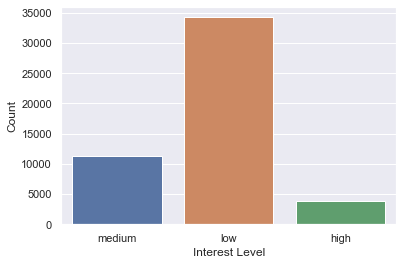

In [72]:
# checking for target variables distribution
sns.set()
sns.countplot(train['interest_level'],dodge=True)
plt.xlabel('Interest Level')
plt.ylabel('Count')
plt.show()

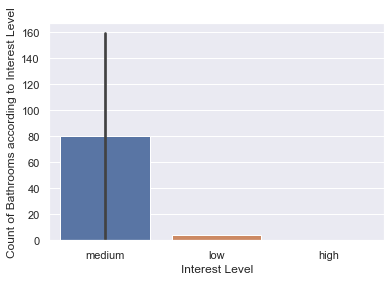

In [73]:
# Plotting target variable with other independent variable
sns.set()
sns.barplot(x=train['interest_level'],y=train['bathrooms'].value_counts())
plt.xlabel('Interest Level')
plt.ylabel('Count of Bathrooms according to Interest Level')
plt.show()

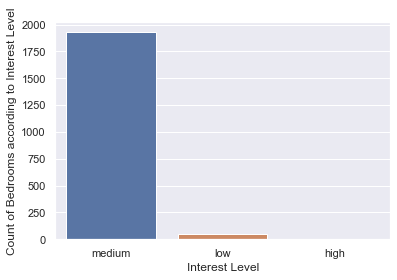

In [74]:
# Plotting target variable with other independent variable
sns.barplot(x=train['interest_level'],y=train['bedrooms'].value_counts())
plt.xlabel('Interest Level')
plt.ylabel('Count of Bedrooms according to Interest Level')
plt.show()

### Derviving new features 

In [75]:
# Deriving some new features based on old features
train["num_photos"] = train["photos"].apply(len)
train["num_features"] = train["features"].apply(len)
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))
train["created"] = pd.to_datetime(train["created"])
train["created_year"] = train["created"].dt.year
train["created_month"] = train["created"].dt.month
train["created_day"] = train["created"].dt.day

In [76]:
# Looking at the head after Deriving new features
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,num_photos,num_features,num_description_words,created_year,created_month,created_day
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,12,7,77,2016,6,16
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,"BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind yourself and your home in the center of it all. Steps from Grand Central Station, at the epicenter of Manhattan, The Centra combines convenience and luxury to create a perfectly balanced living experience. Offering newly renovated over sized apartment layouts.<br /><br />Full Time DoormanElevatorNewly Renovated HallwaysLaundry in BuildingOn-Site Parking Garage<br /><br />I operate with the utmost care and integrity. The client is my #1 priority. Contact me for a viewing of the great apartment, I'm more than confident we'll find a place for you to call home.Call/Text Keon: Email: If you require a move within 30 days write ""URGENT"" in the subject email or text message to be taken with high priority.<br /><br />One Month Free - net effective rent listed<p><a website_redacted",East 44th,"[Doorman, Elevator, Laundry in Building, Dishwasher, Hardwood Floors, No Fee]",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,"[https://photos.renthop.com/2/7092344_7663c19af02c46104bc4c569f7162ae0.jpg, https://photos.renthop.com/2/7092344_8287349abe511d195a7b6129bf24af0e.jpg, https://photos.renthop.com/2/7092344_e9e6a2b7aa95aa7564fe3318cadcf4e7.jpg, https://photos.renthop.com/2/7092344_d51ee4b92fd9246633f93afe6e86d8f0.jpg, https://photos.renthop.com/2/7092344_f0573fa184ca130b1b6000f2fa90511c.jpg, https://photos.renthop.com/2/7092344_b2a62f769a59a317b0a243000db46fd0.jpg]",3800,230 East 44th,low,6,6,131,2016,6,1
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,"**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**Looking for the perfect apartment in Midtown East - Sutton Place? Come check out the beautiful apartment in this prime location! **Mid 50's and 1st Ave** Elevator Building with 24-hour doorman, laundry room, and bike room!LARGE living space with King Bedroom!Beautiful large kitchen with stainless steel appliances including dishwasher! Stunning modern bathroom! Amp

In [77]:
# Making  list of numeric columns
num_feats = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
             "num_photos", "num_features", "num_description_words",
             "created_year", "created_month", "created_day"]

In [78]:
# X and Y Split
X = train[num_feats]
y = train["interest_level"]
X.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_year,created_month,created_day
4,1.0,1,40.7108,-73.9539,2400,12,7,77,2016,6,16
6,1.0,2,40.7513,-73.9722,3800,6,6,131,2016,6,1
9,1.0,2,40.7575,-73.9625,3495,6,6,119,2016,6,14
10,1.5,3,40.7145,-73.9425,3000,5,0,95,2016,6,24
15,1.0,0,40.7439,-73.9743,2795,4,4,41,2016,6,28


In [79]:
y.head()

4     medium
6        low
9     medium
10    medium
15       low
Name: interest_level, dtype: object

## Train - Test Split

In [80]:
# Importing Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [81]:
# Looking at the head of X_train

In [82]:
X_train.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_year,created_month,created_day
85197,1.0,1,40.7437,-73.9851,5735,46,3,119,2016,4,10
82547,2.0,3,40.7530,-73.9695,5200,5,7,61,2016,5,15
86350,2.0,4,40.7624,-73.9964,7445,6,13,97,2016,4,14
104448,1.0,1,40.7611,-73.9989,5123,4,4,276,2016,4,13
64814,1.0,1,40.7745,-73.9897,3895,6,12,113,2016,5,25


In [83]:
X_train.shape

(34546, 11)

In [84]:
X_val.shape

(14806, 11)

## Building a Model using Random Forest

In [85]:
# Importing Libraries
from sklearn.ensemble import RandomForestClassifier

# Creating an object of RandomForestClassifier class with name rf_model and fitting the model on X_train and y_train
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
# Predicting the values and checking for log_loss
y_val_pred = rf_model.predict_proba(X_val)
y_val_pred[:5]

array([[0.015  , 0.881  , 0.104  ],
       [0.007  , 0.897  , 0.096  ],
       [0.65625, 0.044  , 0.29975],
       [0.     , 0.998  , 0.002  ],
       [0.003  , 0.956  , 0.041  ]])

In [87]:
# Importing Metrics
from sklearn import metrics
metrics.log_loss(y_val, y_val_pred)

0.6175343145727317

#### - As we got the log_loss score as 0.6232 which is a pretty good score. Let's test it on test data set to get a clear understanding 

### Making Prediction

In [88]:
print(test.shape)

(74659, 14)


In [89]:
# Derviving same features which we derived for train dataset
test["num_photos"] = test["photos"].apply(len)
test["num_features"] = test["features"].apply(len)
test["num_description_words"] = test["description"].apply(lambda x: len(x.split(" ")))
test["created"] = pd.to_datetime(test["created"])
test["created_year"] = test["created"].dt.year
test["created_month"] = test["created"].dt.month
test["created_day"] = test["created"].dt.day

In [90]:
# Looking the head of the test data
test.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,num_photos,num_features,num_description_words,created_year,created_month,created_day
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,8,6,78,2016,6,11
1,1.0,2,0,2016-06-24 06:36:34,"Prime Soho - between Bleecker and Houston - Newly renovated, with stainless steel appliances, hardwood floors, marble bath. Convenient to world class restaurants, shopping, galleries. Subway C,E,B,D,F,M. To schedule a viewing call Andrew today.",Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,"[https://photos.renthop.com/2/7210040_d824cc713a28c53e7fe318fd0bd20b9b.jpg, https://photos.renthop.com/2/7210040_59a5256ba78c99e5845d87ca85e837f3.jpg, https://photos.renthop.com/2/7210040_c47b518a0ddecf3a20b159baf7f2afdd.jpg]",2850,176 Thompson Street,3,3,35,2016,6,24


In [91]:
# Spliting the data into X 
X = test[num_feats]
X.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_year,created_month,created_day
0,1.0,1,40.7185,-73.9865,2950,8,6,78,2016,6,11
1,1.0,2,40.7278,-74.0000,2850,3,3,35,2016,6,24
2,1.0,0,40.7260,-74.0026,2295,1,3,39,2016,6,17
3,1.0,2,40.7321,-74.0028,2900,4,3,22,2016,6,21
5,1.0,1,40.7054,-74.0095,3254,6,10,85,2016,6,16


In [92]:
# Predicting on y value 
y = rf_model.predict_proba(X)

In [93]:
# Looking at the values of class labels
final_df = {label: i for i, label in enumerate(rf_model.classes_)}
final_df

{'high': 0, 'low': 1, 'medium': 2}

In [94]:
# Creating a new dataframe which can store value of listing id and exporting it in csv format
submission = pd.DataFrame()
submission["listing_id"] = test["listing_id"]
for label in ["high", "medium", "low"]:
    submission[label] = y[:, final_df[label]]
submission.to_csv("Submission.csv", index=False)